# RF/DN Multiclass Comparisons on FSDD

In [1]:
# Import necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os


# Define color palette
sns.set(color_codes=True, style="white", context="talk", font_scale=1.5)


def load_result(filename):
    """
    Loads results from specified file
    """
    input = open(filename, "r")
    lines = input.readlines()
    ls = []
    for line in lines:
        ls.append(float(line.strip()))
    return ls


def produce_mean(ls):
    """
    Produces means from list of 6 results
    """
    ls_space = []
    for i in range(int(len(ls) / 6)):
        l = ls[i * 6 : (i + 1) * 6]
        ls_space.append(l)

    return np.mean(ls_space, axis=0)


# Define working directory
audio_dir = os.getcwd()
spec_dir = os.path.join(audio_dir, "3_class")
mel_dir = os.path.join(audio_dir, "3_class_mel")
mfcc_dir = os.path.join(audio_dir, "3_class_mfcc")

# Load 3-classes accuracies
acc_3 = [
    load_result(os.path.join(audio_dir, "3_class/naive_rf.txt")),
    load_result(os.path.join(audio_dir, "3_class/cnn32.txt")),
    load_result(os.path.join(audio_dir, "3_class/cnn32_2l.txt")),
    load_result(os.path.join(audio_dir, "3_class/cnn32_5l.txt")),
    load_result(os.path.join(audio_dir, "3_class/resnet18.txt")),
]

# Load 8-classes results
acc_8 = [
    load_result(os.path.join(audio_dir, "8_class/naive_rf.txt")),
    load_result(os.path.join(audio_dir, "8_class/cnn32.txt")),
    load_result(os.path.join(audio_dir, "8_class/cnn32_2l.txt")),
    load_result(os.path.join(audio_dir, "8_class/cnn32_5l.txt")),
    load_result(os.path.join(audio_dir, "8_class/resnet18.txt")),
]

# Load 3-classes accuracies
acc_3_mel = [
    load_result(os.path.join(audio_dir, "3_class_mel/naive_rf.txt")),
    load_result(os.path.join(audio_dir, "3_class_mel/cnn32.txt")),
    load_result(os.path.join(audio_dir, "3_class_mel/cnn32_2l.txt")),
    load_result(os.path.join(audio_dir, "3_class_mel/cnn32_5l.txt")),
    load_result(os.path.join(audio_dir, "3_class_mel/resnet18.txt")),
]

# Load 8-classes results
acc_8_mel = [
    load_result(os.path.join(audio_dir, "8_class_mel/naive_rf.txt")),
    load_result(os.path.join(audio_dir, "8_class_mel/cnn32.txt")),
    load_result(os.path.join(audio_dir, "8_class_mel/cnn32_2l.txt")),
    load_result(os.path.join(audio_dir, "8_class_mel/cnn32_5l.txt")),
    load_result(os.path.join(audio_dir, "8_class_mel/resnet18.txt")),
]

# Load 3-classes accuracies
acc_3_mfcc = [
    load_result(os.path.join(audio_dir, "3_class_mfcc/naive_rf.txt")),
    load_result(os.path.join(audio_dir, "3_class_mfcc/cnn32.txt")),
    load_result(os.path.join(audio_dir, "3_class_mfcc/cnn32_2l.txt")),
    load_result(os.path.join(audio_dir, "3_class_mfcc/cnn32_5l.txt")),
    load_result(os.path.join(audio_dir, "3_class_mfcc/resnet18.txt")),
]

# Load 8-classes results
acc_8_mfcc = [
    load_result(os.path.join(audio_dir, "8_class_mfcc/naive_rf.txt")),
    load_result(os.path.join(audio_dir, "8_class_mfcc/cnn32.txt")),
    load_result(os.path.join(audio_dir, "8_class_mfcc/cnn32_2l.txt")),
    load_result(os.path.join(audio_dir, "8_class_mfcc/cnn32_5l.txt")),
    load_result(os.path.join(audio_dir, "8_class_mfcc/resnet18.txt")),
]

accs = [acc_3, acc_8]
accs_mel = [acc_3_mel, acc_8_mel]
accs_mfcc = [acc_3_mfcc, acc_8_mfcc]


def plot_acc(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][2][k * 6 : (k + 1) * 6],
            color="#377eb8",
            linestyle="dashed",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][3][k * 6 : (k + 1) * 6],
            color="#377eb8",
            linestyle="dotted",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][4][k * 6 : (k + 1) * 6],
            color="#4daf4a",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-1L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
            label="CNN-2L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
            label="ResNet-18",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
            label="CNN-5L",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
        )

## RF & DN with Spectrogram

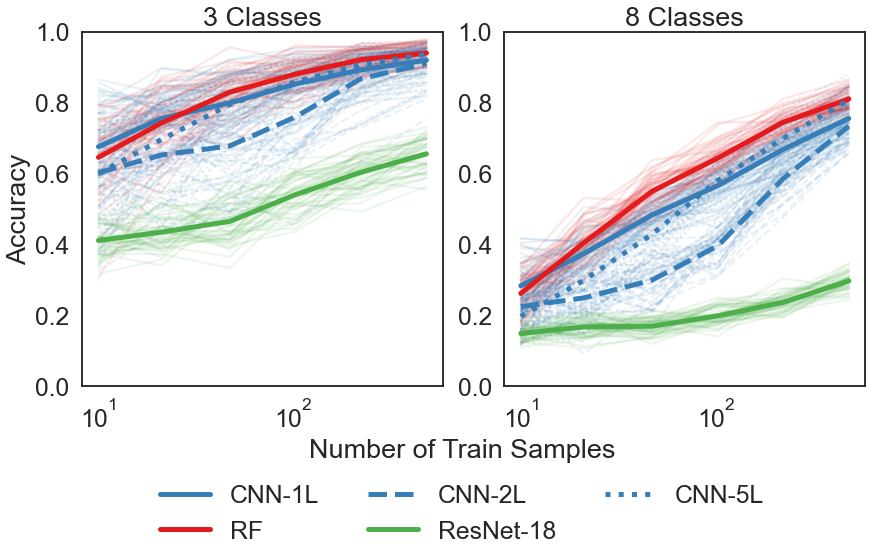

In [2]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["3 Classes", "8 Classes"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, accs, i)
    if i == 0:
        col.set_ylabel("Accuracy")
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../../paper/figures/spoken.pdf", transparent=True, bbox_inches="tight")

## RF & DN with Mel-Spectrogram

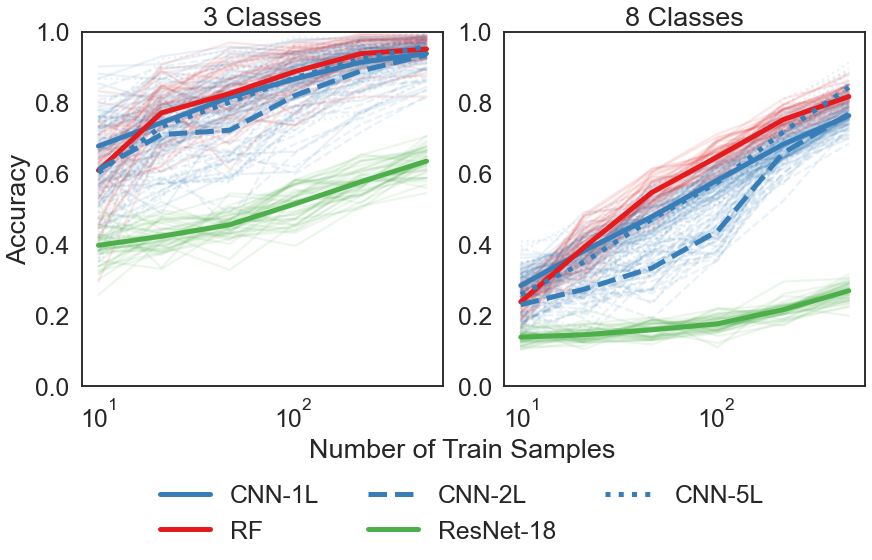

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["3 Classes", "8 Classes"]
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[0, 1], [1e-1, 1e7]]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim(ylimits[0])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, accs_mel, i)

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../../paper/figures/mel.pdf", transparent=True, bbox_inches="tight")

## RF & DN with MFCC

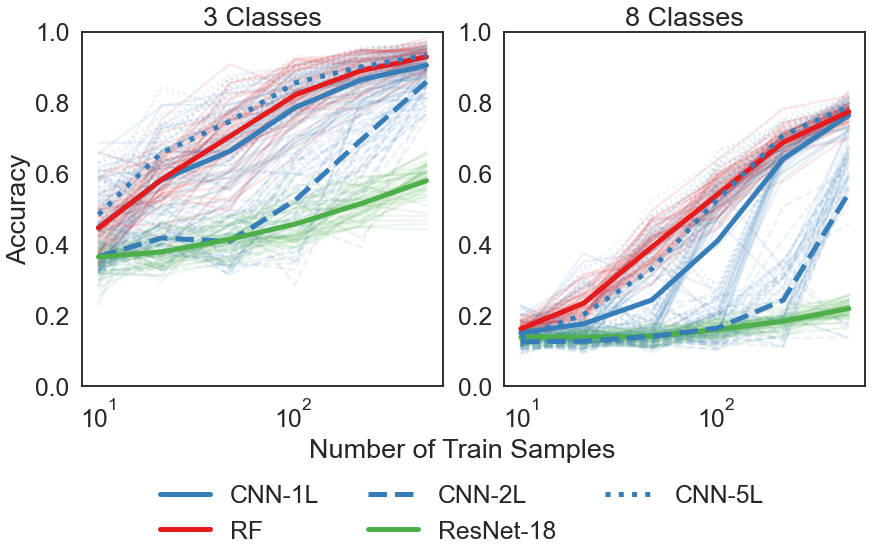

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["3 Classes", "8 Classes"]
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[0, 1], [1e-1, 1e7]]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim(ylimits[0])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, accs_mfcc, i)

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../../paper/figures/mfcc.pdf", transparent=True, bbox_inches="tight")